In [1]:
import numpy as np #导入NumPy
import pandas as pd #导入Pandas
df_member = pd.read_csv('data/member.csv') #载入数据集
df_member.head() #显示数据头几行

,用户码,性别,玫瑰套餐,紫罗兰套餐,郁金香套餐,百合套餐,康乃馨套餐,胡姬花套餐,生日套餐,情人节套餐,会员卡类型,入会月数,会费支付方式,平均月消费,总消费,已停付会费
0,1,女,是,是,否,是,否,是,是,否,年卡,9,手工转账,65.6,593.3,否
1,2,男,否,否,否,否,否,否,否,是,月卡,9,手工转账,59.9,542.4,否
2,3,男,否,否,否,否,是,否,否,否,月卡,4,就餐时付费,73.9,280.85,是
3,4,男,是,否,否,是,是,否,是,是,月卡,13,就餐时付费,98.0,1237.85,是
4,5,女,否,是,否,否,否,是,是,是,月卡,9,花呗付款,69.4,571.45,否


In [2]:
df_member.describe() # 显示数据集数值字段概率

from utils import set_chinese_label
set_chinese_label()

In [3]:
from pandas.api.types import is_numeric_dtype #导入is_numeric_dtype工具
is_numeric_dtype(df_member['总消费']) #是否为数值字段？

False

In [4]:
df_member['总消费'] = pd.to_numeric(df_member['总消费'], errors='coerce') #把总消费字段转换成数值字段
df_member['总消费'].fillna(0, inplace=True) #补充0值
is_numeric_dtype(df_member['总消费']) #是否为数值字段？

True

In [5]:
df_member.describe() # 显示数据集数值字段概率

,用户码,入会月数,平均月消费,总消费
count,7043.000000,7043.000000,7043.000000,7043.000000
mean,3522.000000,32.371149,64.761692,2279.734304
std,2033.283305,24.559481,30.090047,2266.794470
min,1.000000,0.000000,18.250000,0.000000
25%,1761.500000,9.000000,35.500000,398.550000
50%,3522.000000,29.000000,70.350000,1394.550000
75%,5282.500000,55.000000,89.850000,3786.600000
max,7043.000000,72.000000,118.750000,8684.800000


     用户码  玫瑰套餐  紫罗兰套餐  郁金香套餐  百合套餐  康乃馨套餐  胡姬花套餐  生日套餐  情人节套餐  会员卡类型  入会月数  \
性别                                                                           
女   3488  3488   3488   3488  3488   3488   3488  3488   3488   3488  3488   
男   3555  3555   3555   3555  3555   3555   3555  3555   3555   3555  3555   

    会费支付方式  平均月消费   总消费  已停付会费  
性别                              
女     3488   3488  3488   3488  
男     3555   3555  3555   3555  


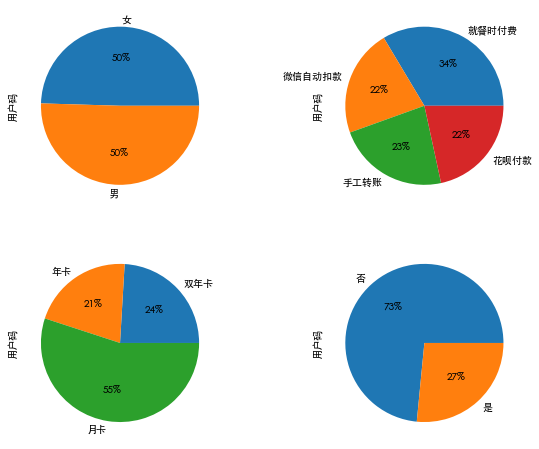

In [6]:
print(df_member.groupby('性别').count())

import matplotlib.pyplot as plt #导入绘图工具
plt.figure(figsize=(10,8)) #图片大小
plt.subplot(2, 2, 1) #子图1
ax = df_member.groupby('性别').count()['用户码'].plot.pie(autopct='%1.0f%%') #饼图1
plt.subplot(2, 2, 2) #子图2
ax = df_member.groupby('会费支付方式').count()['用户码'].plot.pie(autopct='%1.0f%%') #饼图2
plt.subplot(2, 2, 3) #子图3
ax = df_member.groupby('会员卡类型').count()['用户码'].plot.pie(autopct='%1.0f%%') #饼图3
plt.subplot(2, 2, 4) #子图4
ax = df_member.groupby('已停付会费').count()['用户码'].plot.pie(autopct='%1.0f%%') #饼图4
plt.show() #显示

In [7]:
# 把汉字转换成0、1值
df_member['已停付会费'].replace(to_replace='是', value=1, inplace=True)
df_member['已停付会费'].replace(to_replace='否',  value=0, inplace=True)
df_member['性别'].replace(to_replace='女', value=0, inplace=True)
df_member['性别'].replace(to_replace='男', value=1, inplace=True)

In [8]:
# 其它的是、否字段转换成布尔型数据
binary_features = ['玫瑰套餐', '紫罗兰套餐', '郁金香套餐', 
                   '百合套餐', '康乃馨套餐', '胡姬花套餐', 
                   '生日套餐','情人节套餐']
for field in binary_features:
    df_member[field] = df_member[field] == '是'
    
df_member

,用户码,性别,玫瑰套餐,紫罗兰套餐,郁金香套餐,百合套餐,康乃馨套餐,胡姬花套餐,生日套餐,情人节套餐,会员卡类型,入会月数,会费支付方式,平均月消费,总消费,已停付会费
0,1,0,True,True,False,True,False,True,True,False,年卡,9,手工转账,65.60,593.30,0
1,2,1,False,False,False,False,False,False,False,True,月卡,9,手工转账,59.90,542.40,0
2,3,1,False,False,False,False,True,False,False,False,月卡,4,就餐时付费,73.90,280.85,1
3,4,1,True,False,False,True,True,False,True,True,月卡,13,就餐时付费,98.00,1237.85,1
4,5,0,False,True,False,False,False,True,True,True,月卡,9,花呗付款,69.40,571.45,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,7039,0,False,False,True,False,False,True,False,False,年卡,13,手工转账,55.15,742.90,0
7039,7040,1,False,False,False,True,False,False,False,False,月卡,2,手工转账,50.30,92.75,0
7040,7041,1,True,False,False,False,False,False,False,True,月卡,22,就餐时付费,85.10,1873.70,1
7041,7042,1,True,True,True,False,True,True,False,True,双年卡,67,手工转账,67.85,4627.65,0


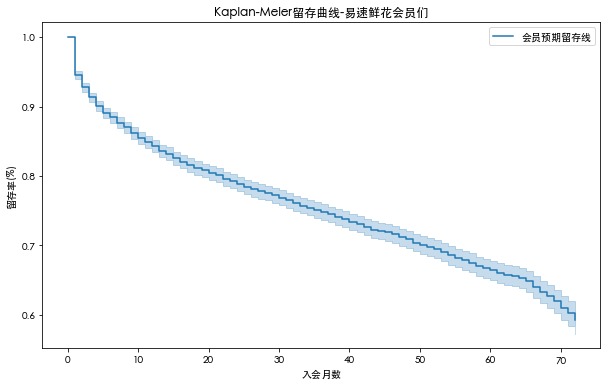

In [12]:
import lifelines #导入生存分析工具包
kmf = lifelines.KaplanMeierFitter() #创建KMF模型
kmf.fit(df_member['入会月数'], #拟合易速鲜花会员流失数据
        event_observed=df_member['已停付会费'], 
        label='会员预期留存线')
fig, ax = plt.subplots(figsize=(10,6)) #画布
kmf.plot(ax=ax) #绘图
ax.set_title('Kaplan-Meier留存曲线-易速鲜花会员们') #图题
ax.set_xlabel('入会月数') #X轴标签
ax.set_ylabel('留存率(%)') #Y轴标签
plt.show() #显示图片

In [13]:
def life_by_cat(feature, t='入会月数', event='已停付会费', df=df_member, ax=None): #定义分类留存曲线函数
    for cat in df[feature].unique(): #遍历类别
        idx = df[feature] == cat #当前类别
        kmf = lifelines.KaplanMeierFitter() #创建KaplanMeier模型
        kmf.fit(df[idx][t], event_observed=df[idx][event], label=cat) #拟合模型
        kmf.plot(ax=ax, label=cat) #绘图

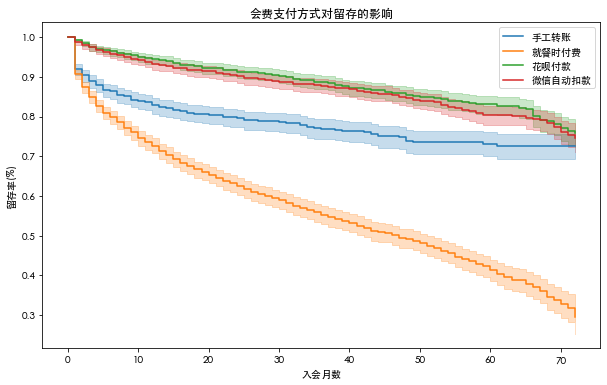

In [14]:
fig_pmt, ax_pmt = plt.subplots(figsize=(10,6)) #画布
life_by_cat(feature='会费支付方式', ax=ax_pmt) #调用函数
ax_pmt.set_title('会费支付方式对留存的影响') #图题
ax_pmt.set_xlabel('入会月数') #X轴标签
ax_pmt.set_ylabel('留存率(%)') #Y轴标签
plt.show() #显示图片

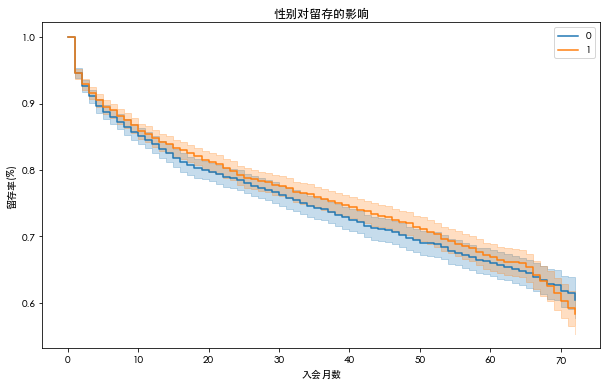

In [15]:
fig_gender, ax_gender = plt.subplots(figsize=(10,6)) #画布
life_by_cat(feature='性别', ax=ax_gender) #调用函数
ax_gender.set_title('性别对留存的影响') #图题
ax_gender.set_xlabel('入会月数') #X轴标签
ax_gender.set_ylabel('留存率(%)') #Y轴标签
plt.show() #显示图片